In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, classification_report

2025-04-25 21:02:41.869595: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-25 21:02:41.893292: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-25 21:02:42.090617: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-25 21:02:42.210260: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745629362.321298    1274 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745629362.36

In [2]:
def organizeData():
    # Retrieves csv
    df = pd.read_csv("./pokedex.csv")
    # Splits the 'type' column in 2, and makes a new column 'primary_type' which stores the first type
    split_types = df['type'].str.strip('{}').str.split(',', n = 1, expand = True)
    df['primary_type'] = split_types[0].str.strip()
    # Only keeps the stats and the primary type
    df = df[['hp', 'attack', 'defense', 's_attack', 's_defense', 'speed', 'primary_type']]
    # Capitalizes the first letter of the primary type (usefulf for later)
    df['primary_type'] = df['primary_type'].str.capitalize()
    return df

In [3]:
df = organizeData()
df

hp  attack  defense  s_attack  s_defense  speed primary_type
0      45      49       49        65         65     45        Grass
1      60      62       63        80         80     60        Grass
2      80      82       83       100        100     80        Grass
3      39      52       43        60         50     65         Fire
4      58      64       58        80         65     80         Fire
...   ...     ...      ...       ...        ...    ...          ...
1020  125      73       91       137         89     75     Electric
1021   90     120       80        68        108    124         Rock
1022   90      72      100       122        108     98        Steel
1023   90      65       85        65         85     60       Normal
1024   88      88      160        88         88     88       Poison

[1025 rows x 7 columns]

In [4]:
# Preprocessing the data always utilizes the label encoder to convert our primary type labels into numeric values
# When oversampling, the RandomOverSampler is used on the data too
# When Normalizing, the Standard Scaler is used on the data too
def preprocess_data(df, method):
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df['primary_type'])
    X = df[['hp', 'attack', 'defense', 's_attack', 's_defense', 'speed']].values

    if method == "none":
        return X, y, label_encoder
    elif method == "oversample":
        ros = RandomOverSampler()
        X_resampled, y_resampled = ros.fit_resample(X, y)
        return X_resampled, y_resampled, label_encoder
    elif method == "normalize+oversample":
        X_scaled = StandardScaler().fit_transform(X)
        ros = RandomOverSampler()
        X_resampled, y_resampled = ros.fit_resample(X_scaled, y)
        return X_resampled, y_resampled, label_encoder

In [5]:
# Shows the distribution of the different labels (primary types) in the data provided
def plot_type_distribution(df, title):
    primary_type_order = ['Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Electric', 'Rock', 'Fire',
                     'Dark', 'Poison', 'Ground', 'Ghost', 'Fighting', 'Ice', 'Dragon', 'Steel',
                     'Fairy', 'Flying']

    type_color_palette = {'None':'powderblue',
                    'Flying':'lavender',
                    'Fairy':'pink',
                    'Psychic':'magenta',
                    'Poison':'darkviolet',
                    'Ground':'peru',
                    'Steel':'silver',
                    'Dragon':'royalblue',
                    'Fighting':'darkorange',
                    'Dark':'black',
                    'Grass':'limegreen',
                    'Ghost':'thistle',
                    'Water':'blue',
                    'Ice':'cyan',
                    'Fire':'red',
                    'Rock':'saddlebrown',
                    'Electric':'yellow',
                    'Normal':'linen',
                    'Bug':'greenyellow'}

    counts = df['primary_type'].value_counts()
    type_sizes = [counts.get(pt, 0) for pt in primary_type_order]
    colors = [type_color_palette[pt] for pt in primary_type_order]
    plt.figure(figsize = (10, 4))
    sns.barplot(x = primary_type_order, y=type_sizes, palette = colors)
    plt.title(title)
    plt.xlabel("Primary Type")
    plt.ylabel("Count")
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_1274/3499401541.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = primary_type_order, y=type_sizes, palette = colors)


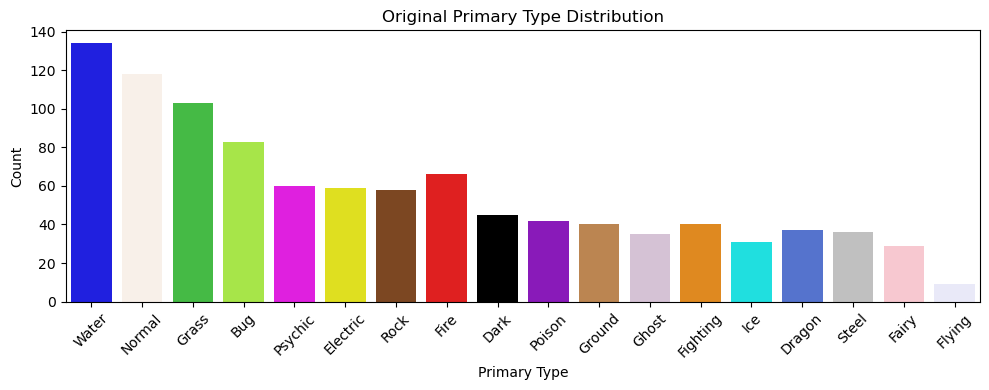

/tmp/ipykernel_1274/3499401541.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = primary_type_order, y=type_sizes, palette = colors)


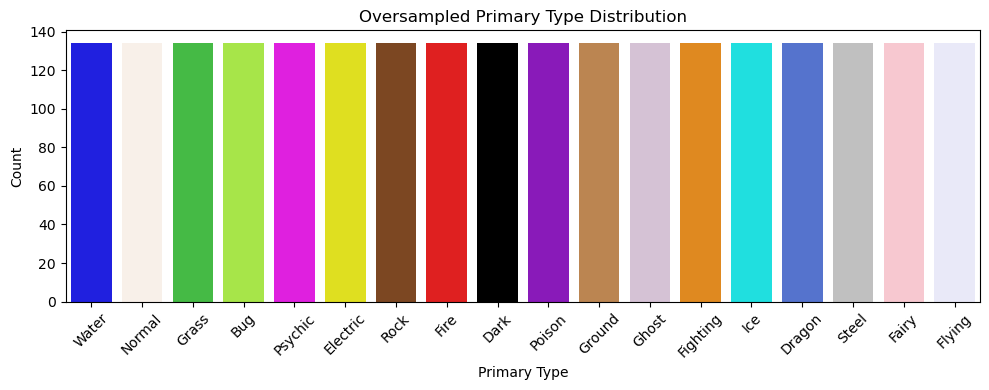

/tmp/ipykernel_1274/3499401541.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = primary_type_order, y=type_sizes, palette = colors)


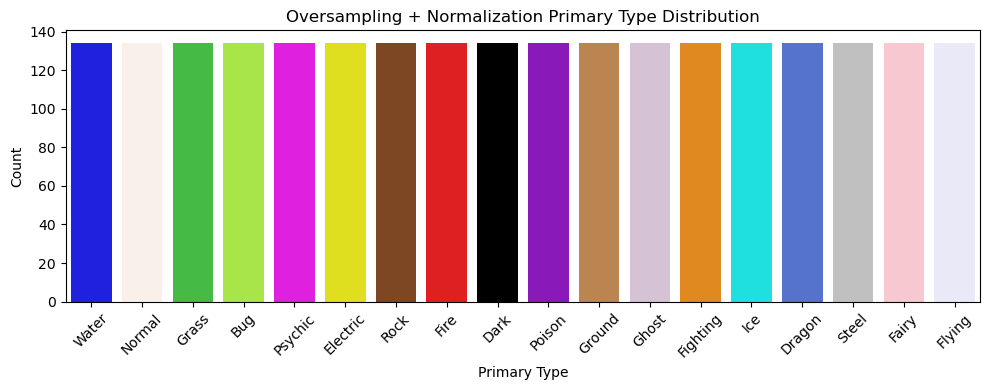

In [6]:
# Original data
x1, y1, label_encoder1 = preprocess_data(df, "none")
df1 = pd.DataFrame(x1, columns=['hp', 'attack', 'defense', 's_attack', 's_defense', 'speed'])
df1['primary_type'] = label_encoder1.inverse_transform(y1)
plot_type_distribution(df1, title="Original Primary Type Distribution")

# Oversampled data
x2, y2, label_encoder2 = preprocess_data(df, "oversample")
df2 = pd.DataFrame(x2, columns=['hp', 'attack', 'defense', 's_attack', 's_defense', 'speed'])
df2['primary_type'] = label_encoder2.inverse_transform(y2)
plot_type_distribution(df2, title="Oversampled Primary Type Distribution")

# Oversampled + Normalized
x3, y3, label_encoder3 = preprocess_data(df, "normalize+oversample")
df3 = pd.DataFrame(x3, columns=['hp', 'attack', 'defense', 's_attack', 's_defense', 'speed'])
df3['primary_type'] = label_encoder3.inverse_transform(y3)
plot_type_distribution(df3, title="Oversampling + Normalization Primary Type Distribution")

In [7]:
# Building the model, different optimizers can be selected based on input
# Sparse categorical crossentropy used for loss since we have numeric labels
def build_model(optimizer_name, input_shape):
    optimizers = {
        "sgd": keras.optimizers.SGD(),
        "sgd_momentum": keras.optimizers.SGD(momentum=0.9),
        "adam": keras.optimizers.Adam(),
        "adagrad": keras.optimizers.Adagrad(),
        "rmsprop": keras.optimizers.RMSprop()
    }
    optimizer = optimizers[optimizer_name]

    model = keras.Sequential([
        keras.Input(shape=(input_shape,)),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(18, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

In [8]:
# Performs the train test split on the data, 20% testing data and 80% training data
# By default this is over 500 epochs, and the validation split is 10% of the training data
def train_and_evaluate(model, X, y, label_encoder, title_suffix = "", numEpochs = 500):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    history = model.fit(X_train, y_train, batch_size = 64, epochs = numEpochs, validation_split = 0.1, verbose = 1)

    # Accuracy graph
    plt.figure(figsize = (6, 4))
    plt.plot(history.history['accuracy'], label = 'Train Acc')
    plt.plot(history.history['val_accuracy'], label = 'Val Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy {title_suffix}')
    plt.legend()
    plt.show()

    # Loss graph
    plt.figure(figsize = (6, 4))
    plt.plot(history.history['loss'], label = 'Train Loss', color = 'black')
    plt.plot(history.history['val_loss'], label = 'Val Loss', color = 'maroon')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Loss Trajectory {title_suffix}')
    plt.legend()
    plt.show()

    # Confusion Matrix
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y_test, y_pred_classes)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm, annot=True, fmt = 'd', xticklabels = label_encoder.classes_, yticklabels = label_encoder.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f'Confusion Matrix {title_suffix}')
    plt.show()

    # Classification Report
    report = classification_report(y_test, y_pred_classes, output_dict = True, target_names = label_encoder.classes_)
    print(classification_report(y_test, y_pred_classes, target_names = label_encoder.classes_))

    # Graph for Precision, Recall, and F1 Score
    classes = list(label_encoder.classes_)
    x = np.arange(len(classes))
    precision_vals = [report[i]['precision'] for i in classes]
    recall_vals = [report[j]['recall'] for j in classes]
    f1_vals = [report[k]['f1-score'] for k in classes]
    plt.figure(figsize = (14, 6))
    plt.bar(x - 0.25, precision_vals, 0.25, label = 'Precision')
    plt.bar(x, recall_vals, 0.25, label = 'Recall')
    plt.bar(x + 0.25, f1_vals, 0.25, label = 'F1-Score')
    plt.xticks(x, classes, rotation = 45)
    plt.ylabel('Score')
    plt.title(f'Precision, Recall, and F1-Score per Class {title_suffix}')
    plt.legend()
    plt.tight_layout()
    plt.show()  

E0000 00:00:1745629370.178338    1274 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1745629370.178898    1274 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.0956 - loss: 6.7663 - val_accuracy: 0.1220 - val_loss: 3.0767
Epoch 2/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1029 - loss: 3.3213 - val_accuracy: 0.1829 - val_loss: 2.5997
Epoch 3/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1342 - loss: 2.8127 - val_accuracy: 0.2195 - val_loss: 2.6105
Epoch 4/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1713 - loss: 2.6425 - val_accuracy: 0.2439 - val_loss: 2.5800
Epoch 5/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1617 - loss: 2.7085 - val_accuracy: 0.2805 - val_loss: 2.5459
Epoch 6/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2123 - loss: 2.6049 - val_accuracy: 0.2927 - val_loss: 2.5761
Epoch 7/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1690 - loss: 2.6143 - val_accuracy: 0.2439 - val_loss: 2.5346
Epoch 8/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1712 - loss: 2.6167 - val_accuracy: 0.

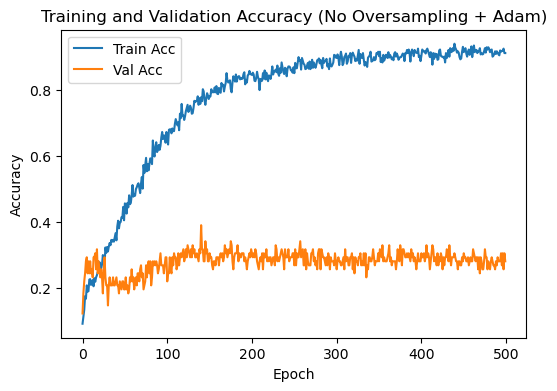

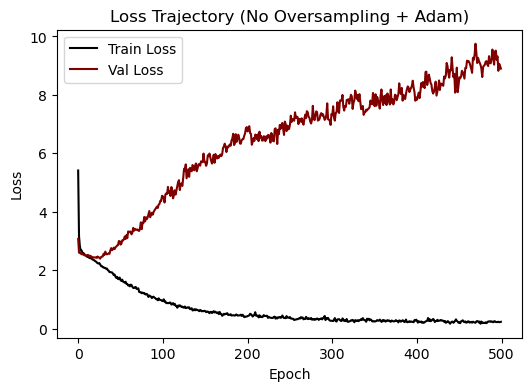

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


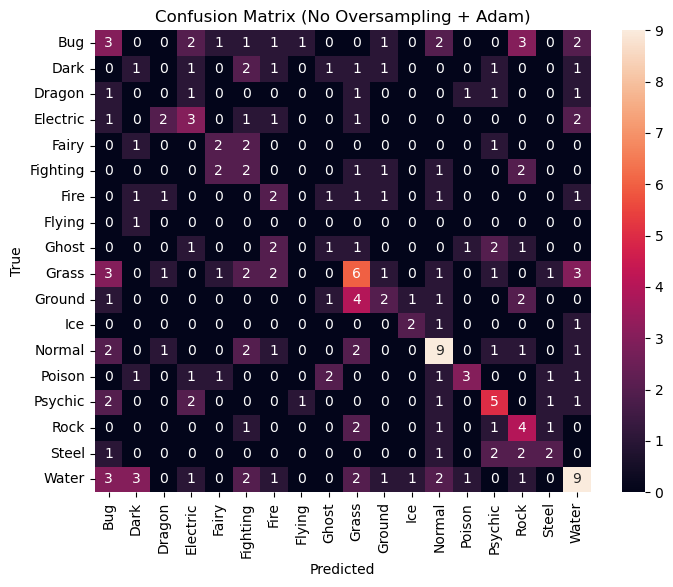

              precision    recall  f1-score   support

         Bug       0.18      0.18      0.18        17
        Dark       0.12      0.10      0.11        10
      Dragon       0.00      0.00      0.00         6
    Electric       0.25      0.27      0.26        11
       Fairy       0.29      0.33      0.31         6
    Fighting       0.13      0.22      0.17         9
        Fire       0.18      0.22      0.20         9
      Flying       0.00      0.00      0.00         1
       Ghost       0.17      0.11      0.13         9
       Grass       0.27      0.27      0.27        22
      Ground       0.25      0.17      0.20        12
         Ice       0.50      0.50      0.50         4
      Normal       0.41      0.45      0.43        20
      Poison       0.50      0.27      0.35        11
     Psychic       0.33      0.38      0.36        13
        Rock       0.25      0.40      0.31        10
       Steel       0.33      0.25      0.29         8
       Water       0.39    

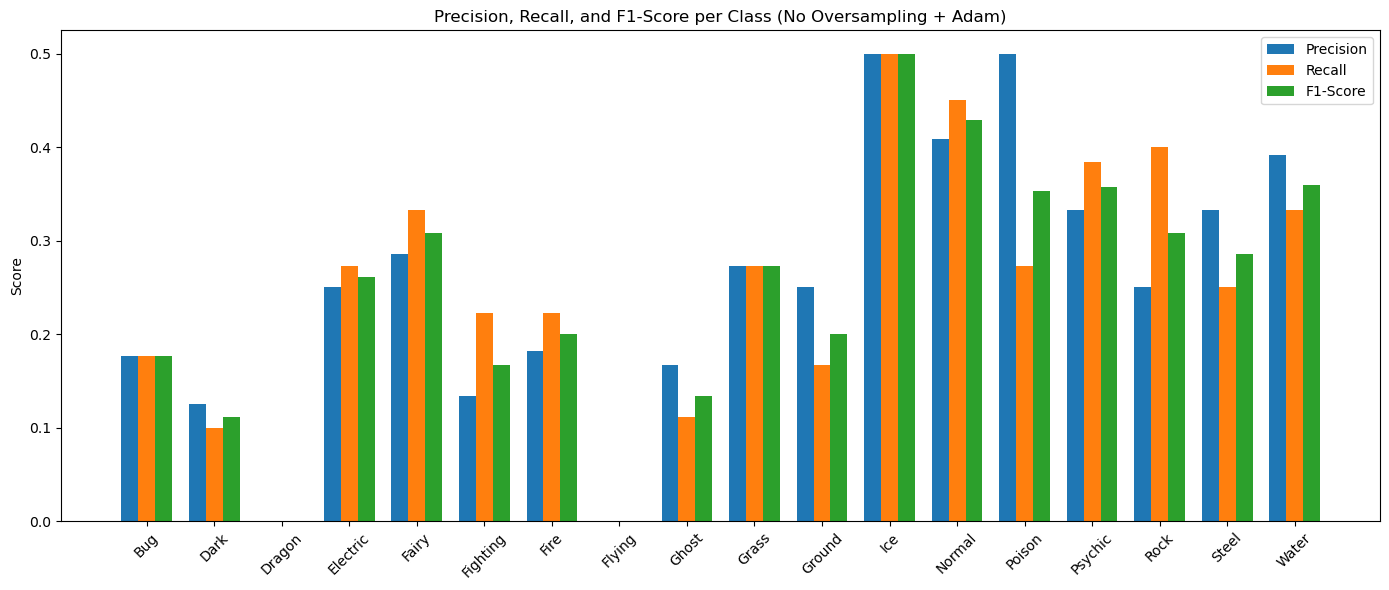

In [9]:
# Model for no oversampling and adam optimizer
model = build_model(optimizer_name = "adam", input_shape = x1.shape[1])
train_and_evaluate(model, x1, y1, label_encoder1, title_suffix = "(No Oversampling + Adam)")

Epoch 1/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.0642 - loss: 6.8140 - val_accuracy: 0.0881 - val_loss: 2.8314
Epoch 2/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1205 - loss: 2.8797 - val_accuracy: 0.1554 - val_loss: 2.6914
Epoch 3/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1189 - loss: 2.7689 - val_accuracy: 0.2176 - val_loss: 2.6206
Epoch 4/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1368 - loss: 2.7375 - val_accuracy: 0.2176 - val_loss: 2.5432
Epoch 5/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1511 - loss: 2.6565 - val_accuracy: 0.2124 - val_loss: 2.5544
Epoch 6/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1743 - loss: 2.6205 - val_accuracy: 0.2073 - val_loss: 2.5172
Epoch 7/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1753 - loss: 2.5723 - val_accuracy: 0.2176 - val_loss: 2.4340
Epoch 8/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1836 - loss: 2.4761 - val_accuracy: 0.2435 -

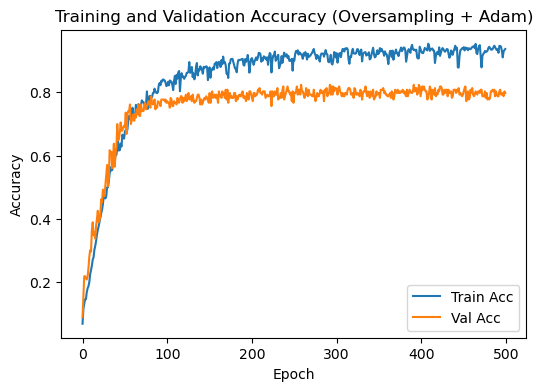

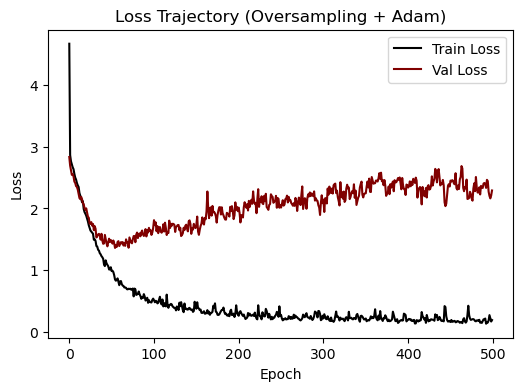

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


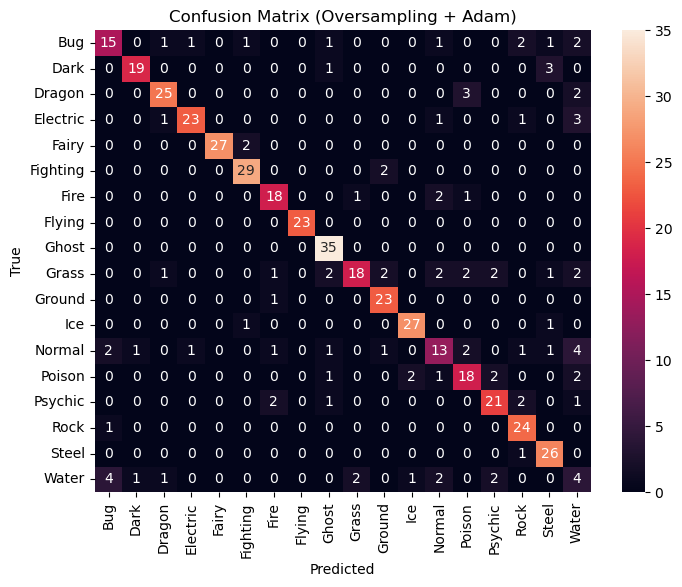

              precision    recall  f1-score   support

         Bug       0.68      0.60      0.64        25
        Dark       0.90      0.83      0.86        23
      Dragon       0.86      0.83      0.85        30
    Electric       0.92      0.79      0.85        29
       Fairy       1.00      0.93      0.96        29
    Fighting       0.88      0.94      0.91        31
        Fire       0.78      0.82      0.80        22
      Flying       1.00      1.00      1.00        23
       Ghost       0.83      1.00      0.91        35
       Grass       0.86      0.55      0.67        33
      Ground       0.82      0.96      0.88        24
         Ice       0.90      0.93      0.92        29
      Normal       0.59      0.46      0.52        28
      Poison       0.69      0.69      0.69        26
     Psychic       0.78      0.78      0.78        27
        Rock       0.77      0.96      0.86        25
       Steel       0.79      0.96      0.87        27
       Water       0.20    

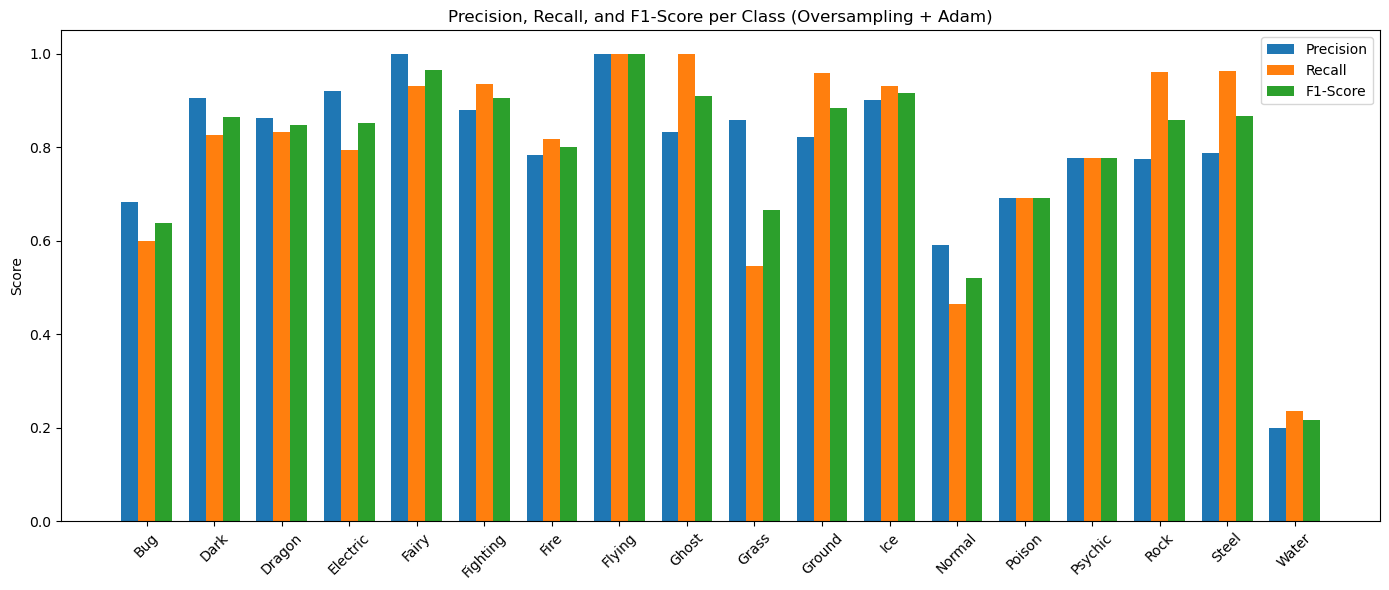

In [10]:
# Model for oversampling and adam optimizer
model = build_model(optimizer_name = "adam", input_shape = x2.shape[1])
train_and_evaluate(model, x2, y2, label_encoder2, title_suffix = "(Oversampling + Adam)")

Epoch 1/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.0847 - loss: 2.8602 - val_accuracy: 0.1399 - val_loss: 2.6463
Epoch 2/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1512 - loss: 2.6021 - val_accuracy: 0.1917 - val_loss: 2.5029
Epoch 3/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1997 - loss: 2.4587 - val_accuracy: 0.2642 - val_loss: 2.3927
Epoch 4/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2119 - loss: 2.4115 - val_accuracy: 0.2435 - val_loss: 2.3753
Epoch 5/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2312 - loss: 2.3352 - val_accuracy: 0.3161 - val_loss: 2.2576
Epoch 6/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2459 - loss: 2.2778 - val_accuracy: 0.3368 - val_loss: 2.1857
Epoch 7/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3099 - loss: 2.1360 - val_accuracy: 0.2953 - val_loss: 2.1107
Epoch 8/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3421 - loss: 2.0703 - val_accuracy: 0.3523

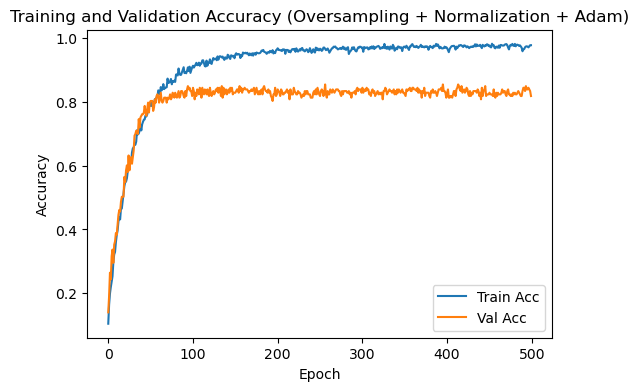

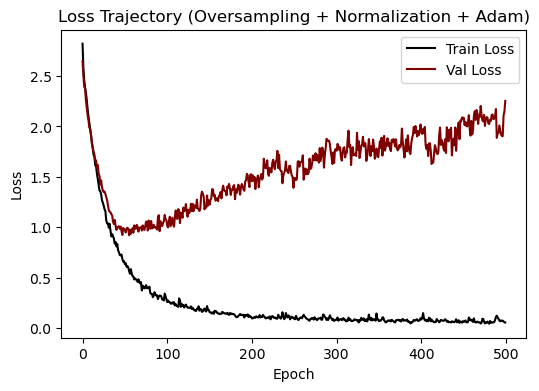

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


              precision    recall  f1-score   support

         Bug       0.55      0.64      0.59        25
        Dark       0.86      0.78      0.82        23
      Dragon       0.83      1.00      0.91        30
    Electric       0.85      0.79      0.82        29
       Fairy       0.91      1.00      0.95        29
    Fighting       1.00      0.97      0.98        31
        Fire       0.81      0.95      0.88        22
      Flying       1.00      1.00      1.00        23
       Ghost       1.00      0.89      0.94        35
       Grass       0.65      0.45      0.54        33
      Ground       0.79      0.96      0.87        24
         Ice       0.97      1.00      0.98        29
      Normal       0.64      0.32      0.43        28
      Poison       0.86      0.96      0.91        26
     Psychic       0.71      0.81      0.76        27
        Rock       0.79      0.92      0.85        25
       Steel       0.89      0.93      0.91        27
       Water       0.00    

In [11]:
# Model for oversampling and normalization and adam optimizer
model = build_model(optimizer_name = "adam", input_shape = x3.shape[1])
train_and_evaluate(model, x3, y3, label_encoder3, title_suffix = "(Oversampling + Normalization + Adam)")

Since we have established that preprocessing with oversampling and normalization is CLEARLY the best for results, we continue with that while testing other versions of the model.

Epoch 1/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0540 - loss: 2.9018 - val_accuracy: 0.0570 - val_loss: 2.8858
Epoch 2/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0683 - loss: 2.8953 - val_accuracy: 0.0725 - val_loss: 2.8824
Epoch 3/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0692 - loss: 2.8896 - val_accuracy: 0.0829 - val_loss: 2.8790
Epoch 4/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0792 - loss: 2.8876 - val_accuracy: 0.0881 - val_loss: 2.8756
Epoch 5/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0790 - loss: 2.8823 - val_accuracy: 0.0829 - val_loss: 2.8724
Epoch 6/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0846 - loss: 2.8806 - val_accuracy: 0.0829 - val_loss: 2.8687
Epoch 7/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0898 - loss: 2.8748 - val_accuracy: 0.0881 - val_loss: 2.8659
Epoch 8/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0896 - loss: 2.8743 - val_accuracy: 0.0933 - 

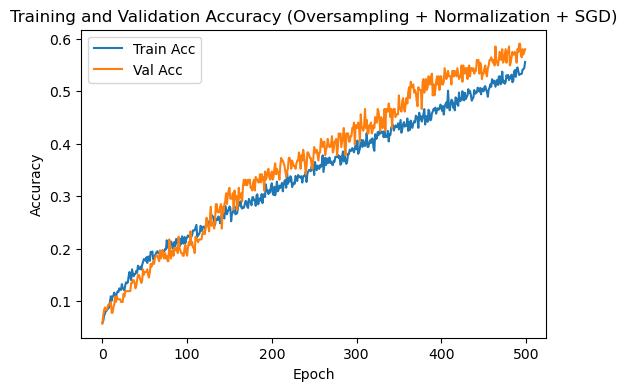

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


              precision    recall  f1-score   support

         Bug       0.43      0.24      0.31        25
        Dark       0.32      0.48      0.39        23
      Dragon       0.69      0.60      0.64        30
    Electric       0.47      0.52      0.49        29
       Fairy       0.56      0.76      0.65        29
    Fighting       0.48      0.48      0.48        31
        Fire       0.44      0.55      0.49        22
      Flying       0.74      1.00      0.85        23
       Ghost       0.75      0.69      0.72        35
       Grass       0.32      0.18      0.23        33
      Ground       0.47      0.75      0.58        24
         Ice       0.83      0.52      0.64        29
      Normal       0.32      0.25      0.28        28
      Poison       0.56      0.38      0.45        26
     Psychic       0.54      0.52      0.53        27
        Rock       0.60      0.60      0.60        25
       Steel       0.50      0.78      0.61        27
       Water       0.11    

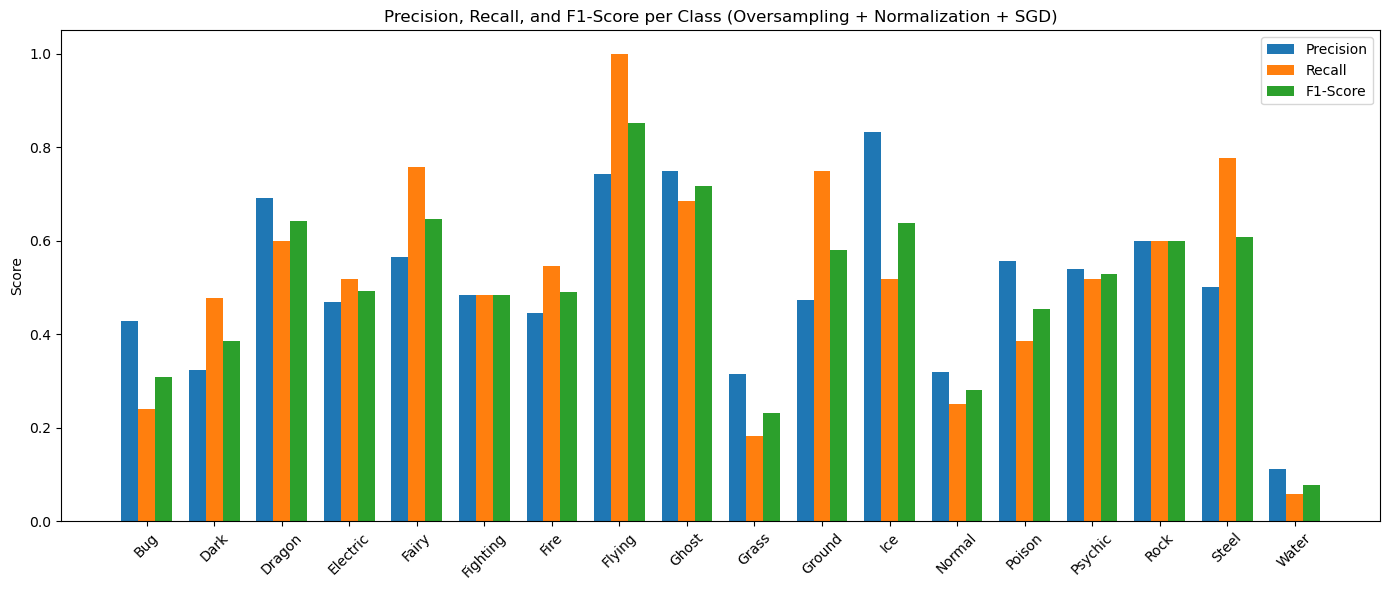

In [12]:
# The model above uses adam with oversampling and normalization, so it will be used to compare with the following models:
# This model is SGD with oversampling and normalization
model = build_model(optimizer_name = "sgd", input_shape = x3.shape[1])
train_and_evaluate(model, x3, y3, label_encoder3, title_suffix = "(Oversampling + Normalization + SGD)")

Epoch 1/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0477 - loss: 2.8951 - val_accuracy: 0.0881 - val_loss: 2.8717
Epoch 2/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0963 - loss: 2.8712 - val_accuracy: 0.1451 - val_loss: 2.8437
Epoch 3/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1151 - loss: 2.8410 - val_accuracy: 0.1192 - val_loss: 2.8026
Epoch 4/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1204 - loss: 2.7970 - val_accuracy: 0.1710 - val_loss: 2.7411
Epoch 5/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1510 - loss: 2.7272 - val_accuracy: 0.1399 - val_loss: 2.6795
Epoch 6/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1590 - loss: 2.6653 - val_accuracy: 0.1813 - val_loss: 2.6234
Epoch 7/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2015 - loss: 2.5755 - val_accuracy: 0.1917 - val_loss: 2.5710
Epoch 8/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1927 - loss: 2.5404 - val_accuracy: 0.1865 - 

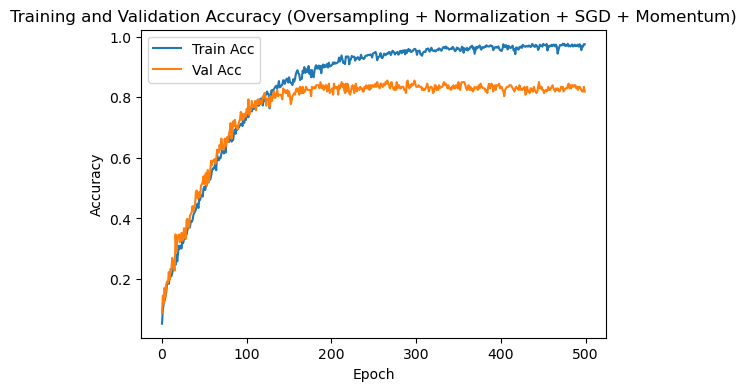

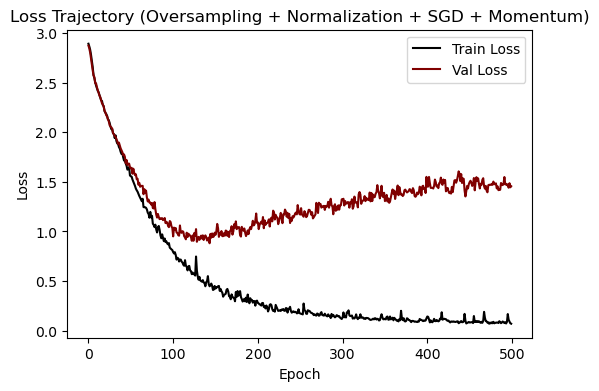

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


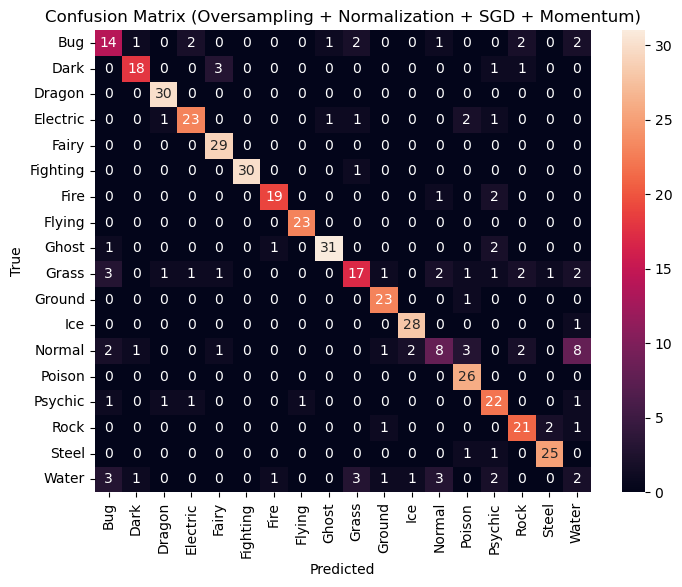

              precision    recall  f1-score   support

         Bug       0.58      0.56      0.57        25
        Dark       0.86      0.78      0.82        23
      Dragon       0.91      1.00      0.95        30
    Electric       0.85      0.79      0.82        29
       Fairy       0.85      1.00      0.92        29
    Fighting       1.00      0.97      0.98        31
        Fire       0.90      0.86      0.88        22
      Flying       0.96      1.00      0.98        23
       Ghost       0.94      0.89      0.91        35
       Grass       0.71      0.52      0.60        33
      Ground       0.85      0.96      0.90        24
         Ice       0.90      0.97      0.93        29
      Normal       0.53      0.29      0.37        28
      Poison       0.76      1.00      0.87        26
     Psychic       0.69      0.81      0.75        27
        Rock       0.75      0.84      0.79        25
       Steel       0.89      0.93      0.91        27
       Water       0.12    

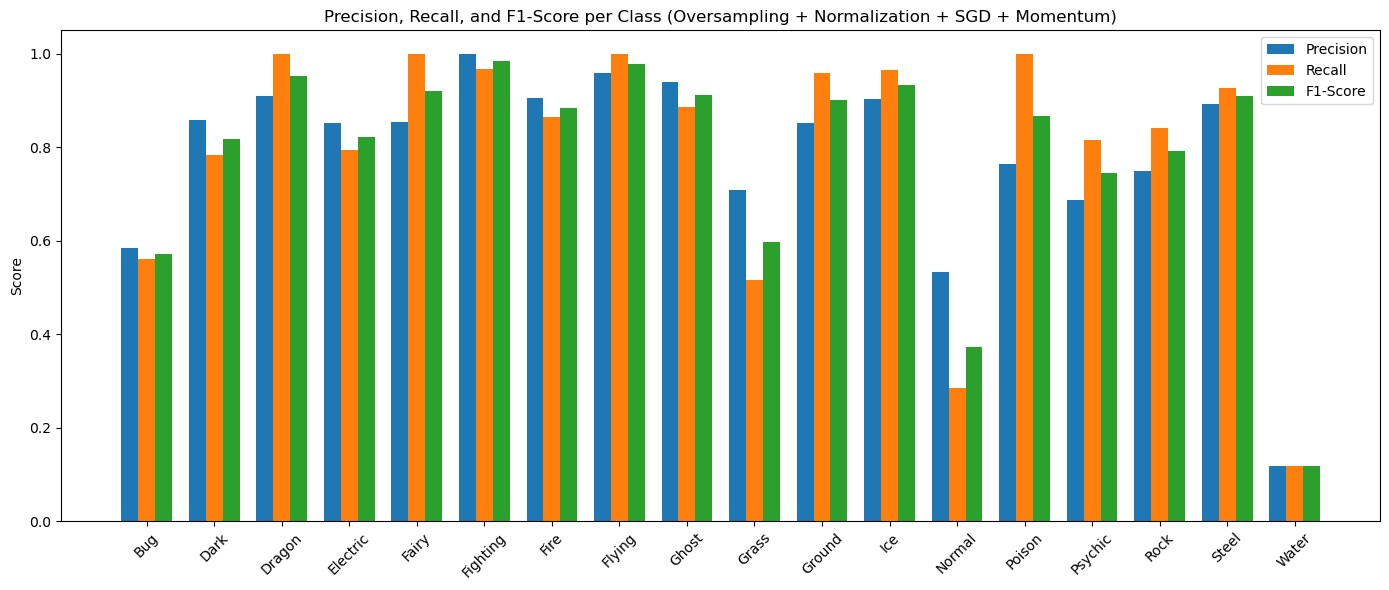

In [13]:
# Model for oversampling and normalization with SGD momentum
model = build_model(optimizer_name = "sgd_momentum", input_shape = x3.shape[1])
train_and_evaluate(model, x3, y3, label_encoder3, title_suffix = "(Oversampling + Normalization + SGD + Momentum)")

Epoch 1/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0691 - loss: 2.8912 - val_accuracy: 0.0725 - val_loss: 2.8975
Epoch 2/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0716 - loss: 2.8941 - val_accuracy: 0.0777 - val_loss: 2.8964
Epoch 3/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0814 - loss: 2.8902 - val_accuracy: 0.0777 - val_loss: 2.8953
Epoch 4/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0682 - loss: 2.8889 - val_accuracy: 0.0777 - val_loss: 2.8943
Epoch 5/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0615 - loss: 2.8904 - val_accuracy: 0.0725 - val_loss: 2.8932
Epoch 6/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0656 - loss: 2.8888 - val_accuracy: 0.0725 - val_loss: 2.8922
Epoch 7/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0711 - loss: 2.8894 - val_accuracy: 0.0725 - val_loss: 2.8913
Epoch 8/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0718 - loss: 2.8849 - val_accuracy: 0.0777 - 

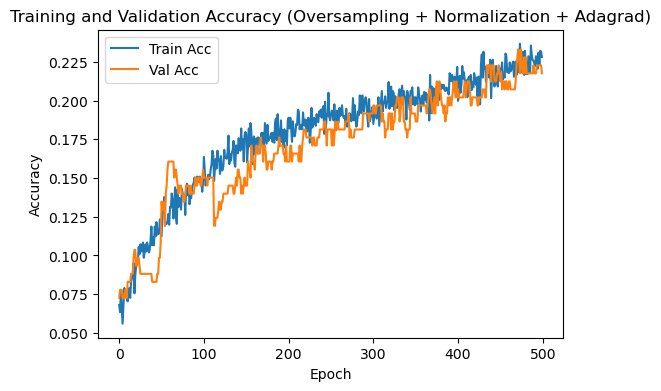

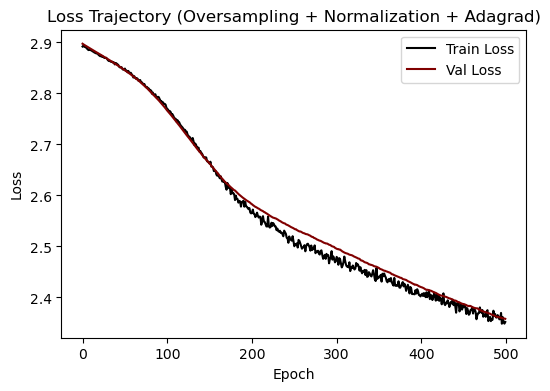

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


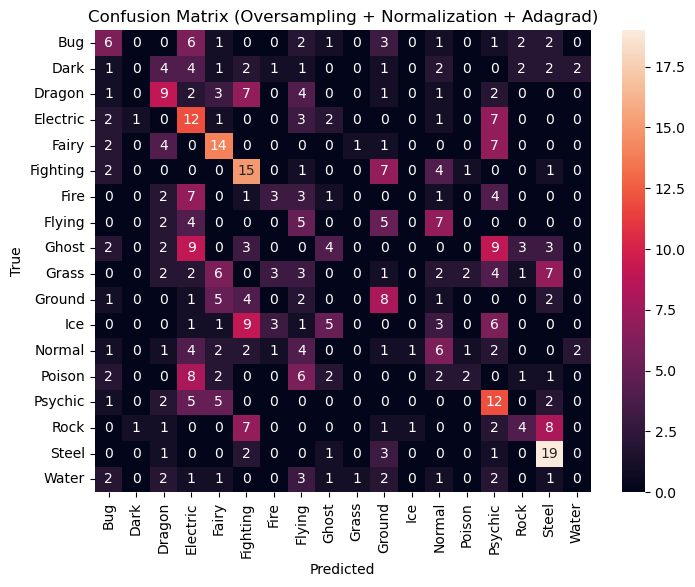

              precision    recall  f1-score   support

         Bug       0.26      0.24      0.25        25
        Dark       0.00      0.00      0.00        23
      Dragon       0.28      0.30      0.29        30
    Electric       0.18      0.41      0.25        29
       Fairy       0.33      0.48      0.39        29
    Fighting       0.29      0.48      0.36        31
        Fire       0.27      0.14      0.18        22
      Flying       0.13      0.22      0.16        23
       Ghost       0.24      0.11      0.15        35
       Grass       0.00      0.00      0.00        33
      Ground       0.24      0.33      0.28        24
         Ice       0.00      0.00      0.00        29
      Normal       0.19      0.21      0.20        28
      Poison       0.33      0.08      0.12        26
     Psychic       0.20      0.44      0.28        27
        Rock       0.31      0.16      0.21        25
       Steel       0.40      0.70      0.51        27
       Water       0.00    

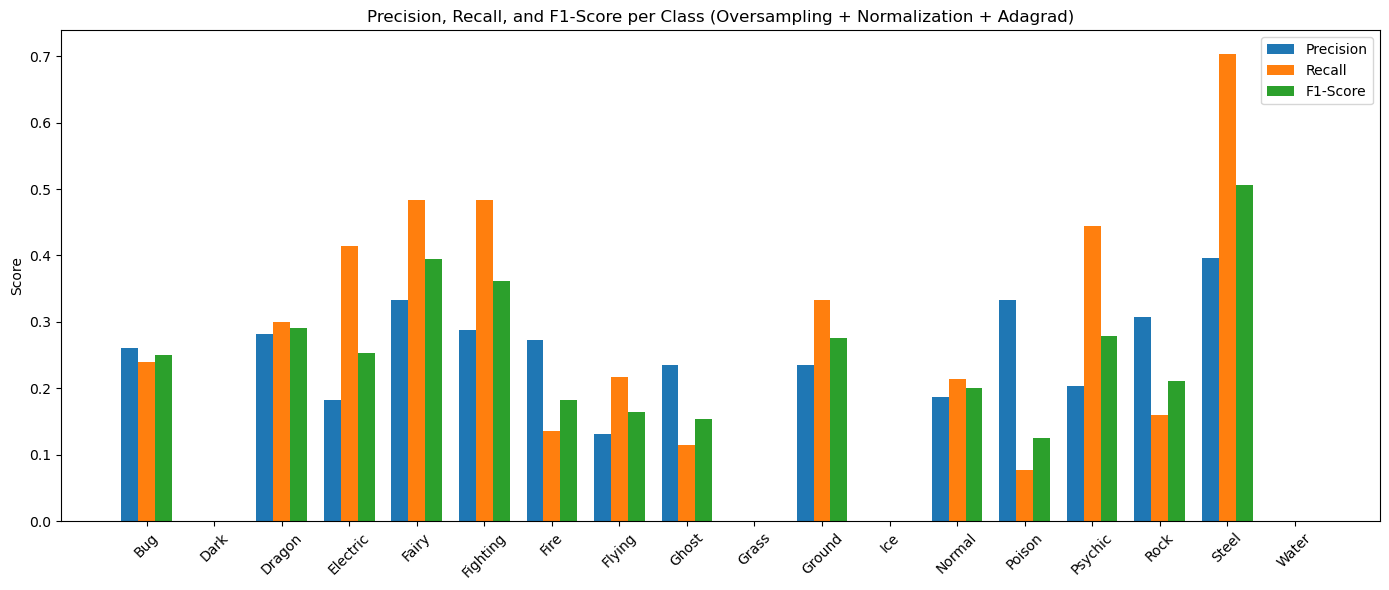

In [14]:
# Model for oversampling and normalization with Adagrad
model = build_model(optimizer_name = "adagrad", input_shape = x3.shape[1])
train_and_evaluate(model, x3, y3, label_encoder3, title_suffix = "(Oversampling + Normalization + Adagrad)")

Epoch 1/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0933 - loss: 2.8271 - val_accuracy: 0.2021 - val_loss: 2.6324
Epoch 2/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1706 - loss: 2.5998 - val_accuracy: 0.1865 - val_loss: 2.5323
Epoch 3/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1895 - loss: 2.4725 - val_accuracy: 0.1969 - val_loss: 2.4758
Epoch 4/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2054 - loss: 2.4495 - val_accuracy: 0.2642 - val_loss: 2.3817
Epoch 5/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2351 - loss: 2.3561 - val_accuracy: 0.2591 - val_loss: 2.3017
Epoch 6/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2661 - loss: 2.2674 - val_accuracy: 0.3057 - val_loss: 2.2639
Epoch 7/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2901 - loss: 2.2353 - val_accuracy: 0.3057 - val_loss: 2.2138
Epoch 8/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2887 - loss: 2.1790 - val_accuracy: 0.3316 - 

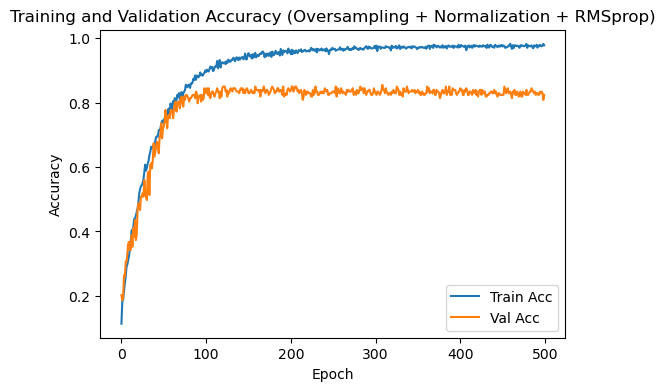

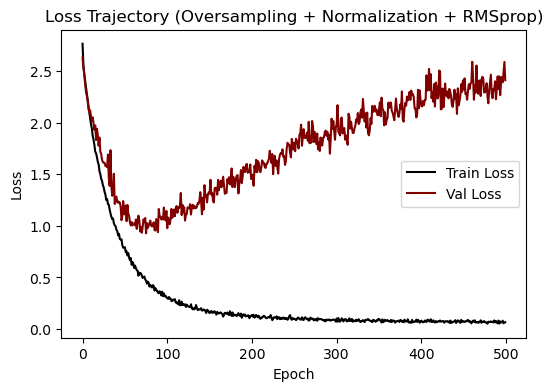

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


              precision    recall  f1-score   support

         Bug       0.54      0.60      0.57        25
        Dark       0.81      0.91      0.86        23
      Dragon       0.94      1.00      0.97        30
    Electric       0.92      0.79      0.85        29
       Fairy       0.97      0.97      0.97        29
    Fighting       0.91      0.97      0.94        31
        Fire       0.79      0.86      0.83        22
      Flying       1.00      1.00      1.00        23
       Ghost       0.97      0.89      0.93        35
       Grass       0.68      0.45      0.55        33
      Ground       0.80      0.83      0.82        24
         Ice       0.97      1.00      0.98        29
      Normal       0.53      0.36      0.43        28
      Poison       0.96      0.96      0.96        26
     Psychic       0.64      0.85      0.73        27
        Rock       0.79      0.92      0.85        25
       Steel       0.92      0.89      0.91        27
       Water       0.11    

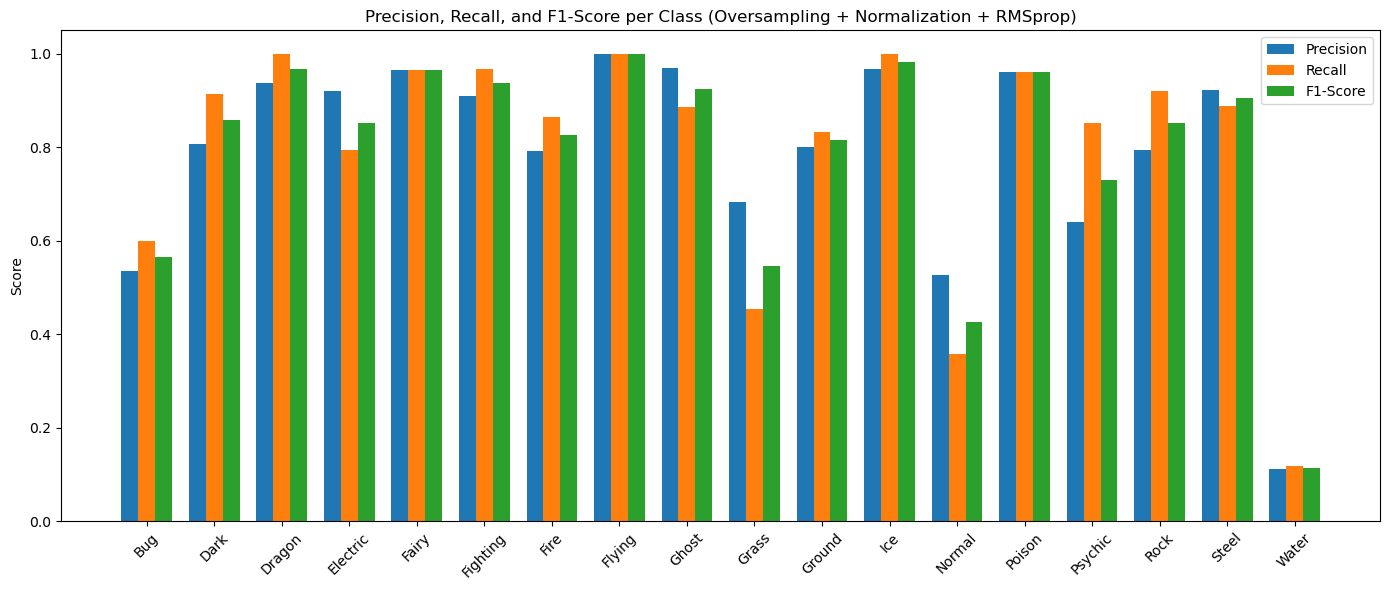

In [15]:
# Model for oversampling and normalization with RMSprop
model = build_model(optimizer_name = "rmsprop", input_shape = x3.shape[1])
train_and_evaluate(model, x3, y3, label_encoder3, title_suffix = "(Oversampling + Normalization + RMSprop)")

All models at 500 epochs do not converge. The models with the best results are SGD (no momentum) and adagrad, which may converge if allowed to run for up to 1000 epochs:

In [16]:
# Model with oversampling and normalization with SGD at 5000 epochs

model = build_model(optimizer_name = "sgd", input_shape = x3.shape[1])
train_and_evaluate(model, x3, y3, label_encoder3, title_suffix = "(Oversampling + Normalization + SGD)", numEpochs = 5000)

Epoch 1/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0641 - loss: 2.8928 - val_accuracy: 0.0415 - val_loss: 2.8952
Epoch 2/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0567 - loss: 2.8949 - val_accuracy: 0.0415 - val_loss: 2.8917
Epoch 3/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0684 - loss: 2.8893 - val_accuracy: 0.0415 - val_loss: 2.8879
Epoch 4/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0692 - loss: 2.8826 - val_accuracy: 0.0466 - val_loss: 2.8846
Epoch 5/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0735 - loss: 2.8788 - val_accuracy: 0.0570 - val_loss: 2.8807
Epoch 6/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0757 - loss: 2.8788 - val_accuracy: 0.0570 - val_loss: 2.8777
Epoch 7/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0655 - loss: 2.8762 - val_accuracy: 0.0674 - val_loss: 2.8746
Epoch 8/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0878 - loss: 2.8741 - val_accuracy: 0

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


              precision    recall  f1-score   support

         Bug       0.64      0.64      0.64        25
        Dark       0.88      0.91      0.89        23
      Dragon       0.91      1.00      0.95        30
    Electric       0.89      0.83      0.86        29
       Fairy       0.85      0.97      0.90        29
    Fighting       0.91      0.97      0.94        31
        Fire       0.78      0.95      0.86        22
      Flying       0.92      1.00      0.96        23
       Ghost       0.97      0.89      0.93        35
       Grass       0.81      0.52      0.63        33
      Ground       0.80      0.83      0.82        24
         Ice       1.00      1.00      1.00        29
      Normal       0.62      0.36      0.45        28
      Poison       0.78      0.96      0.86        26
     Psychic       0.79      0.81      0.80        27
        Rock       0.74      0.92      0.82        25
       Steel       0.86      0.89      0.87        27
       Water       0.07    

Epoch 1/20000
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0682 - loss: 2.8908 - val_accuracy: 0.0777 - val_loss: 2.8911
Epoch 2/20000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0581 - loss: 2.8938 - val_accuracy: 0.0777 - val_loss: 2.8903
Epoch 3/20000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0540 - loss: 2.8951 - val_accuracy: 0.0829 - val_loss: 2.8895
Epoch 4/20000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0620 - loss: 2.8929 - val_accuracy: 0.0777 - val_loss: 2.8887
Epoch 5/20000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0587 - loss: 2.8885 - val_accuracy: 0.0777 - val_loss: 2.8880
Epoch 6/20000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0519 - loss: 2.8904 - val_accuracy: 0.0777 - val_loss: 2.8871
Epoch 7/20000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0647 - loss: 2.8874 - val_accuracy: 0.0777 - val_loss: 2.8863
Epoch 8/20000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0653 - loss: 2.8863 - val_acc

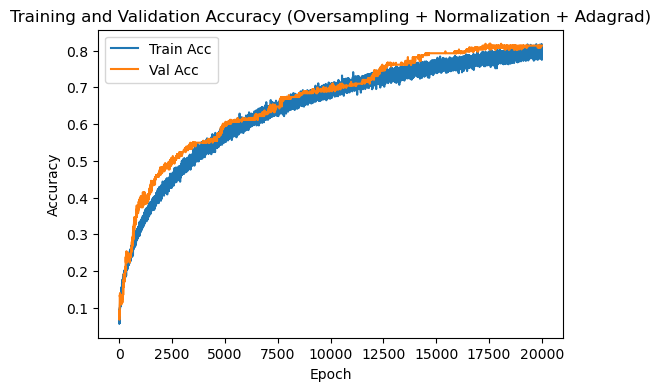

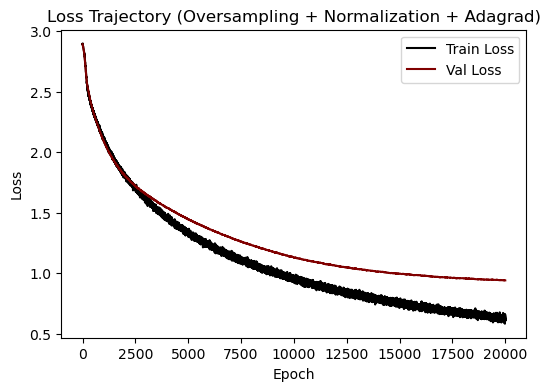

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


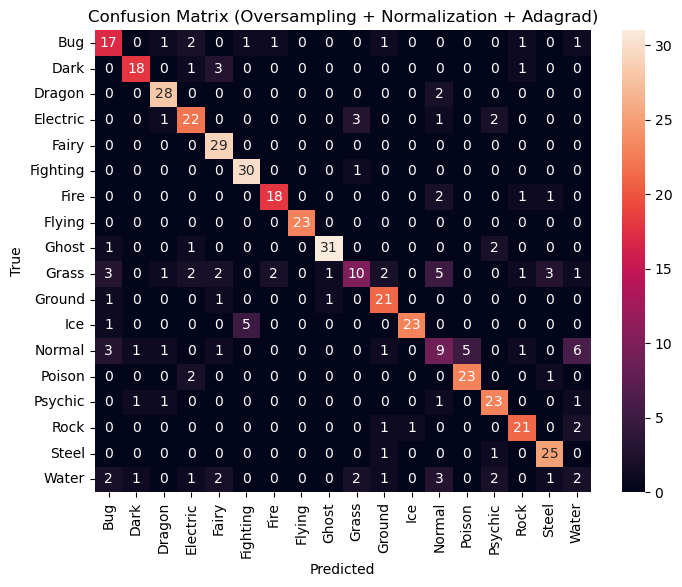

              precision    recall  f1-score   support

         Bug       0.61      0.68      0.64        25
        Dark       0.86      0.78      0.82        23
      Dragon       0.85      0.93      0.89        30
    Electric       0.71      0.76      0.73        29
       Fairy       0.76      1.00      0.87        29
    Fighting       0.83      0.97      0.90        31
        Fire       0.86      0.82      0.84        22
      Flying       1.00      1.00      1.00        23
       Ghost       0.94      0.89      0.91        35
       Grass       0.62      0.30      0.41        33
      Ground       0.75      0.88      0.81        24
         Ice       0.96      0.79      0.87        29
      Normal       0.39      0.32      0.35        28
      Poison       0.82      0.88      0.85        26
     Psychic       0.77      0.85      0.81        27
        Rock       0.81      0.84      0.82        25
       Steel       0.81      0.93      0.86        27
       Water       0.15    

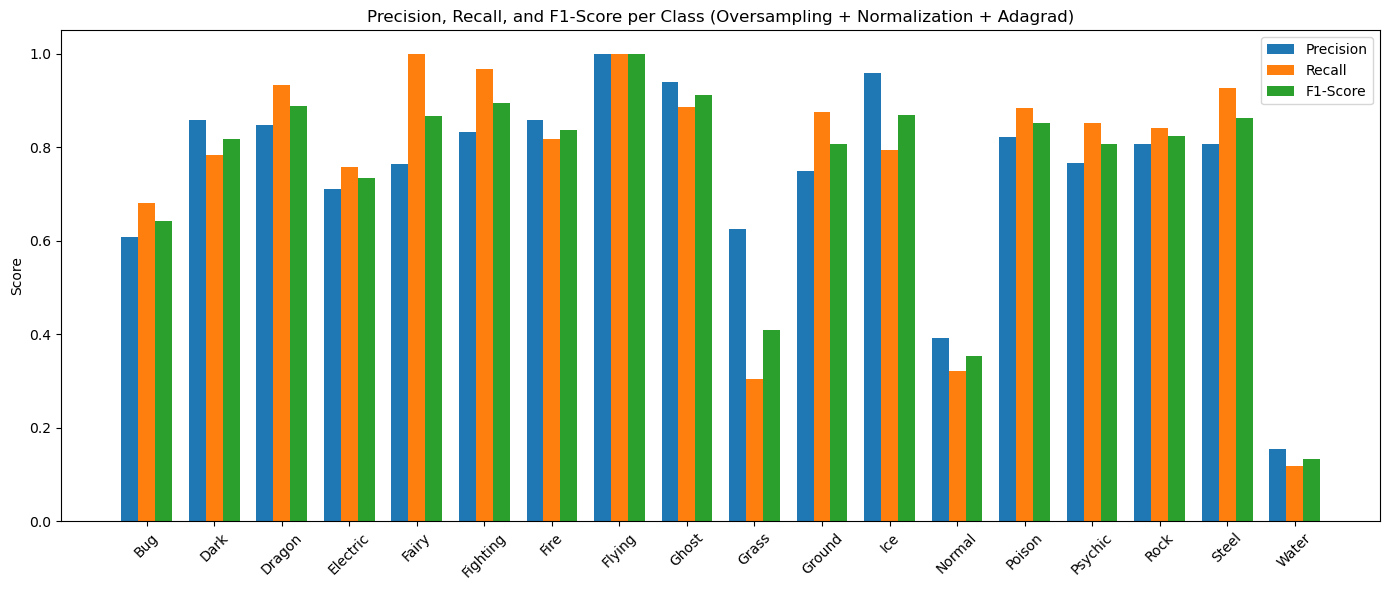

In [17]:
# Model with oversampling and normalization with Adagrad at 20000 epochs
model = build_model(optimizer_name = "adagrad", input_shape = x3.shape[1])
train_and_evaluate(model, x3, y3, label_encoder3, title_suffix = "(Oversampling + Normalization + Adagrad)", numEpochs = 20000)